In [1]:
import numpy as np
import pandas as pd
import pyodbc
import sqlalchemy
import sqlite3
from subprocess import check_output
import os
from IPython.core.display import Image, display

from sqlalchemy import create_engine
engine = create_engine('sqlite:////...', echo=False)

## 1. OLAP: CUBE operator
The first time, we introduced the concept `OLAP` and also `OLTP` is in this [course](https://github.com/Nhan121/Lectures_notes-teaching-in-VN-/blob/master/SQL%20practices/Track:%20SQL%20for%20Database%20Administrators/Course2:%20Database%20Design/processing-storing-and-organizing-data.ipynb)
### Reminder.
$\qquad \diamond$ **`OLAP`.** On-line Analytical Processing.

$\qquad \diamond$ Aggregate data for a better overview; such as:

$\qquad \qquad \bullet$ Count the number of rentings for each customer.

$\qquad \qquad \bullet$ Average rating of movies for each genre and each country.

$\qquad \diamond$ Produce the pivot table to present aggregation result.

$\quad$ Table `rentings_`**extended**

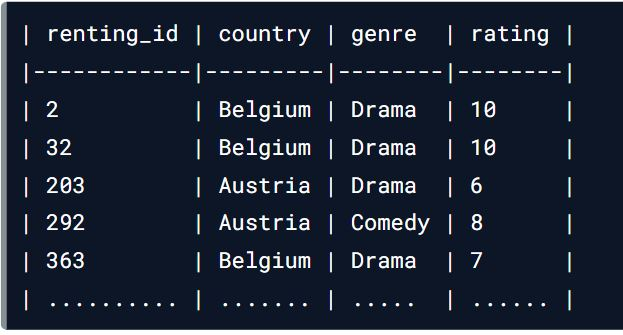

In [2]:
### 

$\quad \circ$ **`Pivot table`. Number of movie rentals**

$\qquad \diamond$ The `left` is the table after using `GROUP BY` and the `aggregation function: COUNT()`

$\qquad \diamond$ The `color` in `right` is corresponding to in the `left`

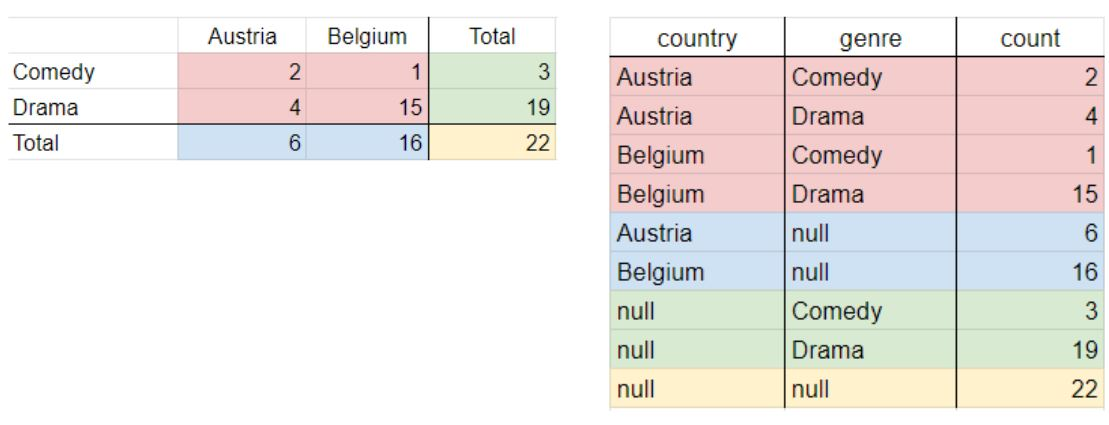

In [3]:
### 

$\quad$ To generate the `right table (image above)`; use **`GROUP BY CUBE (column_1, column_2)`**

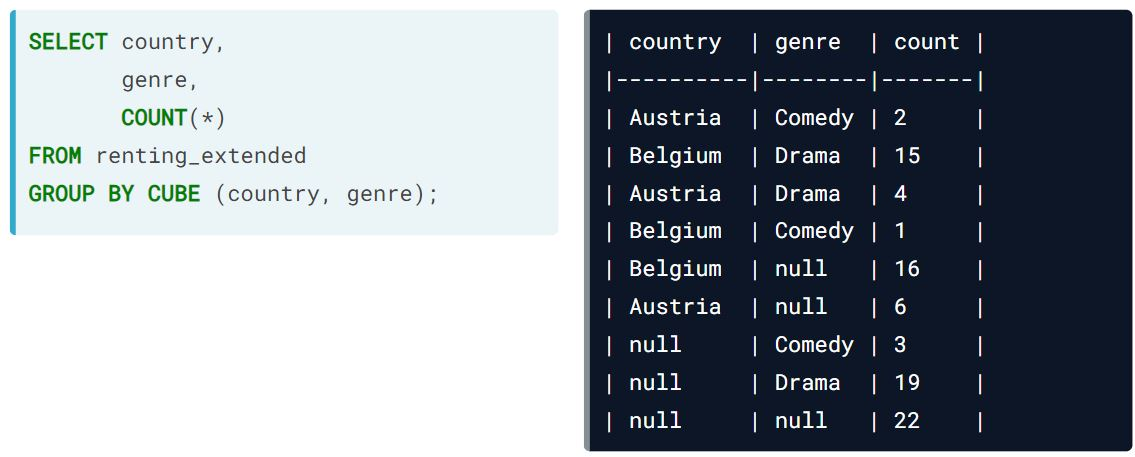

In [4]:
### 

$\quad$ **Count the number of `rating` only**

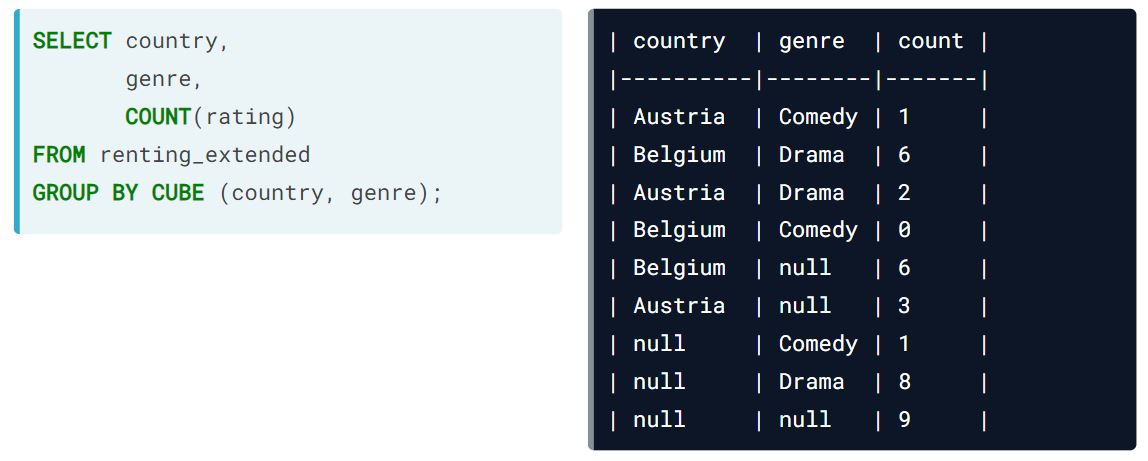

In [5]:
### 
Image(r"C:\Users\Admin\Desktop\fig5.JPG", width = 530, height = 590)

### EXERCISE
#### Exercise 1.1. Groups of customers
$\qquad$ Use the `CUBE` operator to extract the content of a `pivot table` from the database. Create a table with the total number of male and female customers from each country.

#### Instructions
Create a table with the total number of `customers`, of all `female` and `male` customers, of the number of customers for each `country` and the number of men and women from each country.

**SOLUTION.**

                SELECT gender, -- Extract information of a pivot table of gender and country for the number of customers
                       country,
                       COUNT(*)
                FROM customers
                GROUP BY CUBE (gender, country)
                ORDER BY country;
**`query result`.**

gender|country|count
:-|:-|:-
female|Austria|3
male|Austria|1
null|Austria|4
female|Belgium|3
male|Belgium|3
null|Belgium|6
female|Denmark|4
male|Denmark|3
null|Denmark|7
male|France|8
null|France|13
female|France|5
male|Great Britan|5
female|Great Britan|5
null|Great Britan|10
male|Hungary|6
female|Hungary|5
null|Hungary|11
male|Italy|13
null|Italy|27
female|Italy|14
null|Poland|13
female|Poland|4
male|Poland|9
female|Slovenia|7
male|Slovenia|4
null|Slovenia|11
female|Spain|10
male|Spain|6
null|Spain|16
male|USA|2
female|USA|2
null|USA|4
male|null|60
female|null|62
null|null|122

`(36 rows)`

**Comments.** You found out that there are a `total` of `122` customers and that `three out of four` customers from `Austria` are `female`.

#### Exercise 1.2. Categories of movies
$\qquad$ Give an overview on the movies available on `MovieNow`. List the number of movies for different `genres` and `release years`.

#### Instructions
**Step 1.** List the number of movies for different `genres` and the `year of release` on all `aggregation levels` by using the `CUBE operator`.

**SOLUTION.**

                SELECT genre,
                       year_of_release,
                       COUNT(*)
                FROM movies
                GROUP BY CUBE(genre, year_of_release)
                ORDER BY year_of_release;
**`query result`.**

genre|year_of_release|count
:-|:-|:-
null|2001|6
Drama|2001|2
Comedy|2001|2
Science Fiction & Fantasy|2001|2
Comedy|2002|3
null|2002|7
Science Fiction & Fantasy|2002|2
Drama|2002|2
Science Fiction & Fantasy|2003|1
null|2003|8
Comedy|2003|2
Mystery & Suspense|2003|2
Drama|2003|3
Science Fiction & Fantasy|2004|1
Drama|2004|4
Comedy|2004|1
Art House & International|2004|1
null|2004|7
Science Fiction & Fantasy|2005|1
null|2005|3
Drama|2005|2
Drama|2006|6
null|2006|7
Animation|2006|1
null|2007|6
Science Fiction & Fantasy|2007|1
Drama|2007|4
Mystery & Suspense|2007|1
null|2008|3
Action & Adventure|2008|1
Drama|2008|2
Science Fiction & Fantasy|2009|1
Action & Adventure|2009|1
null|2009|2
Science Fiction & Fantasy|2010|1
Comedy|2010|1
null|2010|5
Drama|2010|2
Other|2010|1
null|2011|7
Mystery & Suspense|2011|1
Comedy|2011|1
Science Fiction & Fantasy|2011|1
Drama|2011|4
Action & Adventure|2012|1
Other|2012|1
null|2012|5
Drama|2012|3
Drama|2013|2
null|2013|4
Mystery & Suspense|2013|2
Animation|2014|1
null|2014|1
null|null|71
Action & Adventure|null|3
Comedy|null|10
Mystery & Suspense|null|6
Art House & International|null|1
Drama|null|36
Other|null|2
Animation|null|2
Science Fiction & Fantasy|null|11

`(62 rows)`

**Step 2. Answer this question.** Which statement is **NOT `correct`** about the result table?

- A. From all genres (ignoring the `year of release`) there are most movies in the `category Drama`.
- B. In total there are `71 movies` available on `MovieNow`.
- C. The `year of release` with most movies is `2014`.
- D. From `2002` there are `2 dramas` available on `MovieNow`.

$\diamond$ **Answers & comments.**
- *A. Wrong!!* This statement is true. There are 36 movies in the `Drama genre`.
- *B. Incorrect!!*. This statement is true. The row with null in the column `genre` and `null` in the column `year of release` is the total number of movies.
- **C. Correct!!!** Only one movie `from 2014` is available on `MovieNow`. The `highest` number of movies is `from 2003` with `8 movies`.
- *D. Wrong!!* This statement is true. Have a look at the row with `genre Drama` and `year of release 2002`.

#### Exercise 1.3. Analyzing average ratings
$\qquad$ Prepare a table for a report about the national preferences of the customers from MovieNow comparing the average rating of movies across countries and genres.

#### Instructions.
**Step 1.** Augment the records of movie rentals with information about movies and customers, in this order. Use the first letter of the table names as alias.

**SOLUTION.**

                    SELECT * FROM renting AS r
                    LEFT JOIN customers AS c
                        ON c.customer_id = r.customer_id
                    LEFT JOIN movies AS m
                        ON m.movie_id = r.movie_id;
**`query result`.**

renting_id|customer_id|movie_id|rating|date_renting|customer_id|name|country|gender|date_of_birth|date_account_start|movie_id|title|genre|runtime|year_of_release|renting_price
:-|:-|:-|:-|:-|:-|:-|:-|:-|:-|:-|:-|:-|:-|:-|:-|:-
1|41|8|null|2018-10-09|41|Zara Mitchell|Great Britan|female|1994-07-08|2017-06-12|8|Waking Up in Reno|Comedy|91|2002|2.59
2|10|29|10|2017-03-01|10|Arnout Veenhuis|Belgium|male|1984-07-26|2017-01-28|29|Two for the Money|Drama|122|2005|2.79
3|108|45|4|2018-06-08|108|Saúl Tafoya Meraz|Spain|male|1992-05-15|2017-03-13|45|Burn After Reading|Drama|96|2008|2.39
4|39|66|8|2018-10-22|39|Amy Haynes|Great Britan|female|1975-07-28|2018-01-19|66|The Hunger Games|Drama|142|2012|1.59
...|...|...|...|...|...|...|...|...|...|...|...|...|...|...|...|...|...|...|...|...|...|
576|38|25|null|2018-09-02|38|Millie Marsden|Great Britan|female|1974-07-02|2017-11-06|25|Bridget Jones - The Edge of Reason|Drama|108|2004|2.89
577|35|65|9|2017-07-03|35|Harvey Jarvis|Great Britan|male|1990-01-16|2017-05-22|65|Ghost Rider: Spirit of Vengeance|Action & Adventure|96|2012|1.79
578|35|16|null|2017-06-20|35|Harvey Jarvis|Great Britan|male|1990-01-16|2017-05-22|16|25th Hour|Drama|135|2003|1.59

`(578 rows)`

**Step 2.** Calculate the `average rating` for each `country`.

**SOLUTION.**

                    SELECT country,
                           AVG(rating)
                    FROM renting AS r
                    LEFT JOIN movies AS m
                        ON m.movie_id = r.movie_id
                    LEFT JOIN customers AS c
                        ON r.customer_id = c.customer_id
                    GROUP BY country;
**`query result`.**

country|avg
:-|:-
null|8.0000000000000000
Spain|7.6415094339622642
Great Britan|7.5200000000000000
Austria|6.8000000000000000
Poland|8.1212121212121212
Italy|8.1379310344827586
Slovenia|8.4318181818181818
Hungary|7.6285714285714286
Denmark|7.8888888888888889
Belgium|8.9000000000000000
France|7.7714285714285714
USA|8.0000000000000000

`(12 rows)`

**Step 3.** Calculate the average rating for all aggregation levels of `country` and `genre`.

**SOLUTION.**

                SELECT 
                    c.country, 
                    m.genre, 
                    AVG(r.rating) AS avg_rating -- Calculate the average rating 
                FROM renting AS r
                LEFT JOIN movies AS m
                    ON m.movie_id = r.movie_id
                LEFT JOIN customers AS c
                    ON r.customer_id = c.customer_id
                GROUP BY CUBE(c.country , m.genre)

**`query result`.**

country|genre|avg_rating
:-|:-|:-
null|null|7.9390243902439024
France|Mystery & Suspense|6.0000000000000000
Slovenia|Action & Adventure|null
Spain|Animation|null
Poland|Comedy|8.2000000000000000
Denmark|Drama|7.6000000000000000
Italy|Science Fiction & Fantasy|7.6666666666666667
France|Science Fiction & Fantasy|8.1250000000000000
null|Drama|6.0000000000000000
USA|Mystery & Suspense|3.0000000000000000
Austria|Mystery & Suspense|null
Poland|Action & Adventure|8.5000000000000000
Spain|Art House & International|9.5000000000000000
Italy|Art House & International|9.0000000000000000
Spain|Other|7.0000000000000000
Italy|Animation|7.0000000000000000
USA|Animation|8.0000000000000000
Great Britan|Comedy|10.0000000000000000
Hungary|Mystery & Suspense|6.3333333333333333
France|Other|8.0000000000000000
Great Britan|Mystery & Suspense|8.0000000000000000
Belgium|Mystery & Suspense|null
Slovenia|Drama|8.3666666666666667
Slovenia|Science Fiction & Fantasy|9.8333333333333333
Hungary|Drama|7.4210526315789474
Great Britan|Drama|7.3076923076923077
USA|Action & Adventure|null
Spain|Action & Adventure|9.0000000000000000
Austria|Science Fiction & Fantasy|6.6666666666666667
Austria|Comedy|8.0000000000000000
USA|Science Fiction & Fantasy|7.0000000000000000
Poland|Drama|7.8235294117647059
null|Science Fiction & Fantasy|null
Hungary|Action & Adventure|10.0000000000000000
France|Action & Adventure|9.0000000000000000
Hungary|Animation|8.0000000000000000
USA|Drama|9.0000000000000000
Great Britan|Art House & International|9.0000000000000000
Slovenia|Comedy|7.4000000000000000
Spain|Drama|7.5333333333333333
Slovenia|Animation|6.0000000000000000
Poland|Science Fiction & Fantasy|8.3750000000000000
Italy|Drama|7.9696969696969697
Great Britan|Other|null
Poland|Animation|null
Spain|Mystery & Suspense|7.2500000000000000
Great Britan|Science Fiction & Fantasy|6.4000000000000000
Austria|Drama|6.0000000000000000
Slovenia|Art House & International|8.0000000000000000
Hungary|Other|8.5000000000000000
Hungary|Art House & International|7.0000000000000000
Poland|Mystery & Suspense|null
Spain|Comedy|6.5000000000000000
France|Comedy|6.0000000000000000
France|Drama|7.8500000000000000
null|Comedy|null
Denmark|Science Fiction & Fantasy|9.2500000000000000
Belgium|Drama|9.1666666666666667
Great Britan|Action & Adventure|9.0000000000000000
Poland|Other|10.0000000000000000
null|Animation|10.0000000000000000
Italy|Mystery & Suspense|6.5000000000000000
Denmark|Mystery & Suspense|7.2500000000000000
Hungary|Comedy|7.5000000000000000
Italy|Other|9.6666666666666667
Slovenia|Mystery & Suspense|null
Italy|Action & Adventure|9.2500000000000000
Hungary|Science Fiction & Fantasy|8.4000000000000000
Belgium|Comedy|null
USA|Comedy|10.0000000000000000
Poland|Art House & International|null
Belgium|Science Fiction & Fantasy|8.5000000000000000
Spain|Science Fiction & Fantasy|8.2000000000000000
Italy|Comedy|8.5000000000000000
France|Animation|9.0000000000000000
Slovenia|Other|10.0000000000000000
null|null|8.0000000000000000
Spain|null|7.6415094339622642
Great Britan|null|7.5200000000000000
Austria|null|6.8000000000000000
Poland|null|8.1212121212121212
Italy|null|8.1379310344827586
Slovenia|null|8.4318181818181818
Hungary|null|7.6285714285714286
Denmark|null|7.8888888888888889
Belgium|null|8.9000000000000000
France|null|7.7714285714285714
USA|null|8.0000000000000000
null|Animation|8.0000000000000000
null|Other|8.8000000000000000
null|Drama|7.8594594594594595
null|Art House & International|8.6666666666666667
null|Mystery & Suspense|6.8333333333333333
null|Comedy|7.7666666666666667
null|Action & Adventure|9.0909090909090909
null|Science Fiction & Fantasy|8.1639344262295082

`(96 rows)`

**Step 4. Answer the question.** What is the average rating over all records, rounded to two digits?
- A. 7.94
- B null
- C. 8.80
- D. 7.86

$\diamond$ **Answers & comments.**
- **A. Correct!!!** The `average` over all records is `7.94`.
- *B, C, D. Wrong!!* Look for the row were both categories were aggregated.

## 2. ROLLUP
### Query with `roll up`

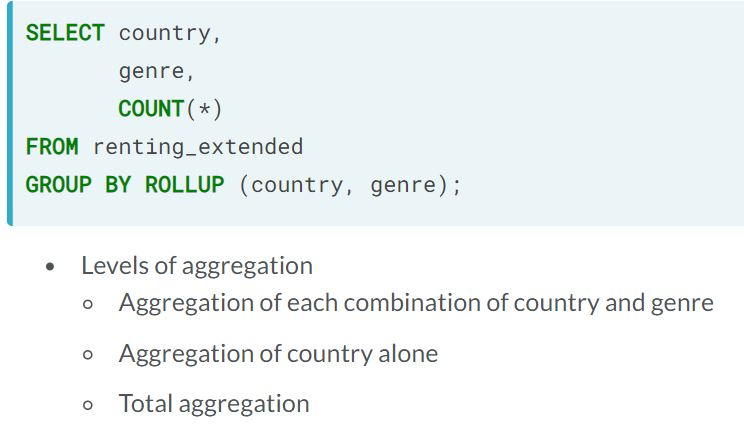

In [6]:
### 

**Result.**

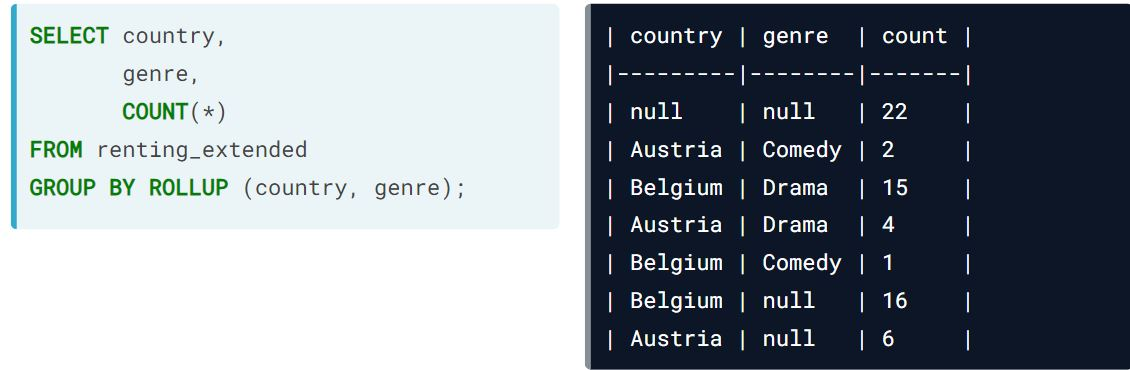

In [7]:
### 

### Order in `ROLL UP`

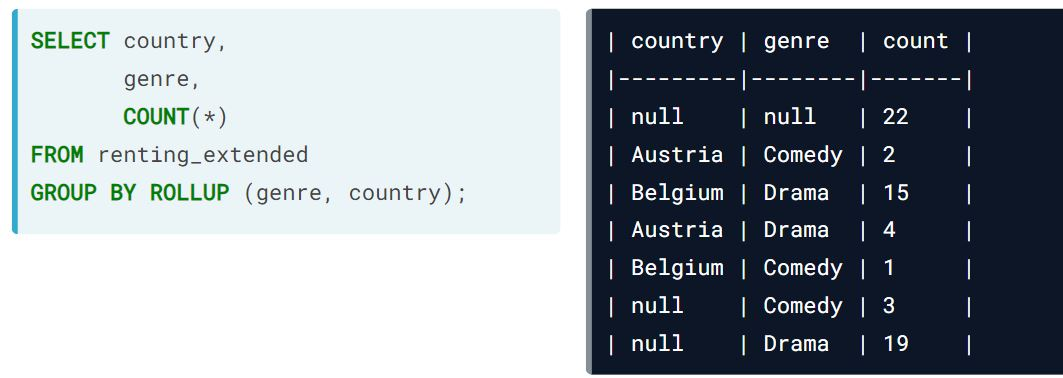

In [8]:
### 

**SUMMARY.**

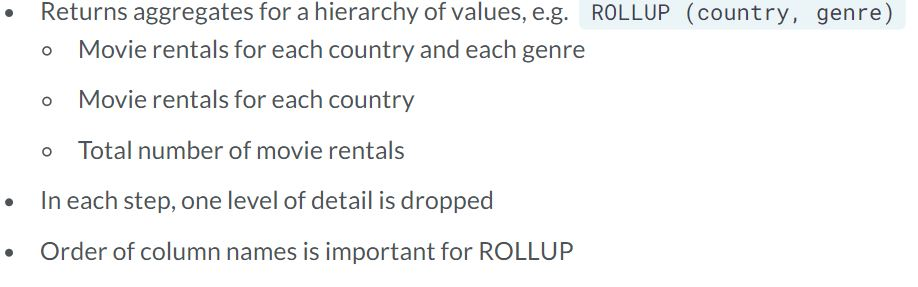

In [9]:
### 

**Number of `rentals` and `ratings`.**

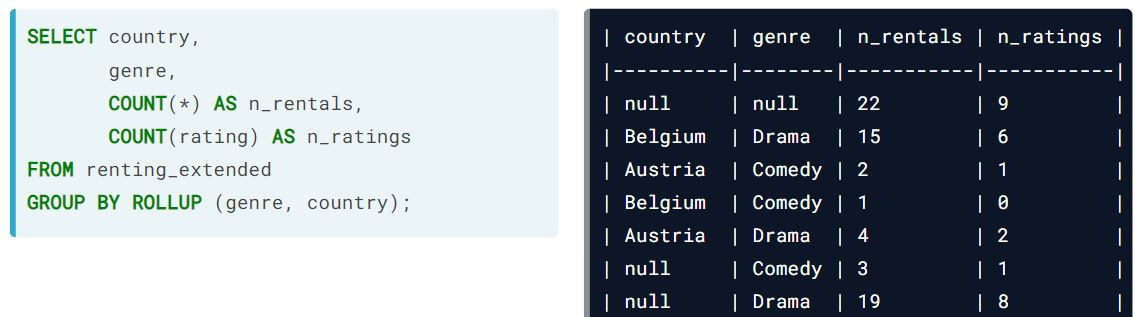

In [10]:
### 

### EXERCISEs.
#### Exercise 2.1.  Number of customers
$\qquad$ You have to give an overview of the number of customers for a presentation.

#### Instructions
- Generate a table with the total number of `customers`, the number of customers for each country, and the number of female and male customers for each `country`.
- Order the result by `country` and `gender`.

**SOLUTION.**

                SELECT country,
                       gender,
                       COUNT(*)
                FROM customers
                GROUP BY ROLLUP (country, gender)
                ORDER BY country, gender; -- Order the result by country and gender
**`query result`.**

country|gender|count
:-|:-|:-
Austria|female|3
Austria|male|1
Austria|null|4
Belgium|female|3
Belgium|male|3
Belgium|null|6
Denmark|female|4
Denmark|male|3
Denmark|null|7
France|female|5
France|male|8
France|null|13
Great Britan|female|5
Great Britan|male|5
Great Britan|null|10
Hungary|female|5
Hungary|male|6
Hungary|null|11
Italy|female|14
Italy|male|13
Italy|null|27
Poland|female|4
Poland|male|9
Poland|null|13
Slovenia|female|7
Slovenia|male|4
Slovenia|null|11
Spain|female|10
Spain|male|6
Spain|null|16
USA|female|2
USA|male|2
USA|null|4
null|null|122

`(34 rows)`

**Comments.** You aggregated the data on different levels and found out that there are 3 female customers and 1 male customer from `Austria`, so in total 4 customers from `Austria`.

#### Exercise 2.2. Analyzing preferences of genres across countries
$\qquad$ You are asked to study the preferences of `genres` across `countries`. Are there particular genres which are more popular in specific countries? Evaluate the preferences of customers by averaging their ratings and counting the number of movies rented from each genre.

#### Instructions.
**Step 1.** Augment the renting records with information about `movies` and `customers`.

**SOLUTION.**

                    -- Join the tables
                    SELECT *
                    FROM renting AS r
                    LEFT JOIN movies AS m
                        ON r.movie_id = m.movie_id
                    LEFT JOIN customers AS c
                    ON r.customer_id = c.customer_id;   
**`query result`.**

renting_id|customer_id|movie_id|rating|date_renting|movie_id|title|genre|runtime|year_of_release|renting_price|customer_id|name|country|gender|date_of_birth|date_account_start
:-|:-|:-|:-|:-|:-|:-|:-|:-|:-|:-|:-|:-|:-|:-|:-|:-
1|41|8|null|2018-10-09|8|Waking Up in Reno|Comedy|91|2002|2.59|41|Zara Mitchell|Great Britan|female|1994-07-08|2017-06-12
2|10|29|10|2017-03-01|29|Two for the Money|Drama|122|2005|2.79|10|Arnout Veenhuis|Belgium|male|1984-07-26|2017-01-28
3|108|45|4|2018-06-08|45|Burn After Reading|Drama|96|2008|2.39|108|Saúl Tafoya Meraz|Spain|male|1992-05-15|2017-03-13
4|39|66|8|2018-10-22|66|The Hunger Games|Drama|142|2012|1.59|39|Amy Haynes|Great Britan|female|1975-07-28|2018-01-19
5|104|15|7|2019-03-18|15|Something's Gotta Give|Comedy|128|2003|1.69|104|Dimitri Zambrano Morales|Spain|male|1992-06-21|2017-04-12
...
575|45|31|10|2018-06-09|31|Harry Potter and the Goblet of Fire|Science Fiction & Fantasy|157|2005|2.69|45|Vargha Ivett|Hungary|female|1998-11-27|2017-08-09
576|38|25|null|2018-09-02|25|Bridget Jones - The Edge of Reason|Drama|108|2004|2.89|38|Millie Marsden|Great Britan|female|1974-07-02|2017-11-06
577|35|65|9|2017-07-03|65|Ghost Rider: Spirit of Vengeance|Action & Adventure|96|2012|1.79|35|Harvey Jarvis|Great Britan|male|1990-01-16|2017-05-22
578|35|16|null|2017-06-20|16|25th Hour|Drama|135|2003|1.59|35|Harvey Jarvis|Great Britan|male|1990-01-16|2017-05-22

`(578 rows)`

**Step 2.** Calculate the `average ratings` and the number of ratings for `each country` and `each genre`. Include the columns `country` and `genre` in the `SELECT` clause.

**SOLUTION.**

                    SELECT 
                        c.country, -- Select country
                        m.genre, -- Select genre
                        AVG(rating), -- Average ratings
                        COUNT(*)  -- Count number of movie rentals
                    FROM renting AS r
                    LEFT JOIN movies AS m
                        ON m.movie_id = r.movie_id
                    LEFT JOIN customers AS c
                        ON r.customer_id = c.customer_id
                    GROUP BY country, genre -- Aggregate for each country and each genre
                    ORDER BY c.country, m.genre;
- **`query result`.**

country|genre|avg|count
:-|:-|:-|:-
Austria|Comedy|8.0000000000000000|1
Austria|Drama|6.0000000000000000|2
Austria|Mystery & Suspense|null|1
Austria|Science Fiction & Fantasy|6.6666666666666667|3
Belgium|Comedy|null|1
Belgium|Drama|9.1666666666666667|15
Belgium|Mystery & Suspense|null|1
Belgium|Science Fiction & Fantasy|8.5000000000000000|7
Denmark|Drama|7.6000000000000000|12
Denmark|Mystery & Suspense|7.2500000000000000|4
Denmark|Science Fiction & Fantasy|9.2500000000000000|7
France|Action & Adventure|9.0000000000000000|1
France|Animation|9.0000000000000000|2
France|Comedy|6.0000000000000000|12
France|Drama|7.8500000000000000|43
France|Mystery & Suspense|6.0000000000000000|4
France|Other|8.0000000000000000|2
France|Science Fiction & Fantasy|8.1250000000000000|16
Great Britan|Action & Adventure|9.0000000000000000|2
Great Britan|Art House & International|9.0000000000000000|1
Great Britan|Comedy|10.0000000000000000|4
Great Britan|Drama|7.3076923076923077|21
Great Britan|Mystery & Suspense|8.0000000000000000|4
Great Britan|Other|null|2
Great Britan|Science Fiction & Fantasy|6.4000000000000000|7
Hungary|Action & Adventure|10.0000000000000000|1
Hungary|Animation|8.0000000000000000|3
Hungary|Art House & International|7.0000000000000000|2
Hungary|Comedy|7.5000000000000000|4
Hungary|Drama|7.4210526315789474|28
Hungary|Mystery & Suspense|6.3333333333333333|4
Hungary|Other|8.5000000000000000|2
Hungary|Science Fiction & Fantasy|8.4000000000000000|7
Italy|Action & Adventure|9.2500000000000000|5
Italy|Animation|7.0000000000000000|1
Italy|Art House & International|9.0000000000000000|1
Italy|Comedy|8.5000000000000000|12
Italy|Drama|7.9696969696969697|62
Italy|Mystery & Suspense|6.5000000000000000|6
Italy|Other|9.6666666666666667|7
Italy|Science Fiction & Fantasy|7.6666666666666667|11
Poland|Action & Adventure|8.5000000000000000|3
Poland|Animation|null|1
Poland|Art House & International|null|1
Poland|Comedy|8.2000000000000000|9
Poland|Drama|7.8235294117647059|31
Poland|Mystery & Suspense|null|1
Poland|Other|10.0000000000000000|2
Poland|Science Fiction & Fantasy|8.3750000000000000|12
Slovenia|Action & Adventure|null|2
Slovenia|Animation|6.0000000000000000|1
Slovenia|Art House & International|8.0000000000000000|1
Slovenia|Comedy|7.4000000000000000|10
Slovenia|Drama|8.3666666666666667|37
Slovenia|Mystery & Suspense|null|5
Slovenia|Other|10.0000000000000000|2
Slovenia|Science Fiction & Fantasy|9.8333333333333333|7
Spain|Action & Adventure|9.0000000000000000|1
Spain|Animation|null|2
Spain|Art House & International|9.5000000000000000|2
Spain|Comedy|6.5000000000000000|13
Spain|Drama|7.5333333333333333|58
Spain|Mystery & Suspense|7.2500000000000000|7
Spain|Other|7.0000000000000000|3
Spain|Science Fiction & Fantasy|8.2000000000000000|15
USA|Action & Adventure|null|1
USA|Animation|8.0000000000000000|1
USA|Comedy|10.0000000000000000|2
USA|Drama|9.0000000000000000|8
USA|Mystery & Suspense|3.0000000000000000|2
USA|Science Fiction & Fantasy|7.0000000000000000|2
null|Animation|10.0000000000000000|1
null|Comedy|null|1
null|Drama|6.0000000000000000|2
null|Science Fiction & Fantasy|null|1

`(75 rows)`

**Step 3.** Finally, calculate the average ratings and the number of ratings for each country and genre, as well as an aggregation **over all genres for each country and the overall average and total number**.

**SOLUTION.**

                    SELECT 
                        c.country, 
                        m.genre, 
                        AVG(r.rating) AS avg_rating, 
                        COUNT(*) AS num_rating
                    FROM renting AS r
                    LEFT JOIN movies AS m
                    ON m.movie_id = r.movie_id
                    LEFT JOIN customers AS c
                    ON r.customer_id = c.customer_id
                    GROUP BY ROLLUP(c.country, m.genre)
                    ORDER BY c.country, m.genre;
**`query result`.**

country|genre|avg_rating|num_rating
:-|:-|:-|:-
Austria|Comedy|8.0000000000000000|1
Austria|Drama|6.0000000000000000|2
Austria|Mystery & Suspense|null|1
Austria|Science Fiction & Fantasy|6.6666666666666667|3
Austria|null|6.8000000000000000|7
Belgium|Comedy|null|1
Belgium|Drama|9.1666666666666667|15
Belgium|Mystery & Suspense|null|1
Belgium|Science Fiction & Fantasy|8.5000000000000000|7
Belgium|null|8.9000000000000000|24
Denmark|Drama|7.6000000000000000|12
Denmark|Mystery & Suspense|7.2500000000000000|4
Denmark|Science Fiction & Fantasy|9.2500000000000000|7
Denmark|null|7.8888888888888889|23
France|Action & Adventure|9.0000000000000000|1
France|Animation|9.0000000000000000|2
France|Comedy|6.0000000000000000|12
France|Drama|7.8500000000000000|43
France|Mystery & Suspense|6.0000000000000000|4
France|Other|8.0000000000000000|2
France|Science Fiction & Fantasy|8.1250000000000000|16
France|null|7.7714285714285714|80
Great Britan|Action & Adventure|9.0000000000000000|2
Great Britan|Art House & International|9.0000000000000000|1
Great Britan|Comedy|10.0000000000000000|4
Great Britan|Drama|7.3076923076923077|21
Great Britan|Mystery & Suspense|8.0000000000000000|4
Great Britan|Other|null|2
Great Britan|Science Fiction & Fantasy|6.4000000000000000|7
Great Britan|null|7.5200000000000000|41
Hungary|Action & Adventure|10.0000000000000000|1
Hungary|Animation|8.0000000000000000|3
Hungary|Art House & International|7.0000000000000000|2
Hungary|Comedy|7.5000000000000000|4
Hungary|Drama|7.4210526315789474|28
Hungary|Mystery & Suspense|6.3333333333333333|4
Hungary|Other|8.5000000000000000|2
Hungary|Science Fiction & Fantasy|8.4000000000000000|7
Hungary|null|7.6285714285714286|51
Italy|Action & Adventure|9.2500000000000000|5
Italy|Animation|7.0000000000000000|1
Italy|Art House & International|9.0000000000000000|1
Italy|Comedy|8.5000000000000000|12
Italy|Drama|7.9696969696969697|62
Italy|Mystery & Suspense|6.5000000000000000|6
Italy|Other|9.6666666666666667|7
Italy|Science Fiction & Fantasy|7.6666666666666667|11
Italy|null|8.1379310344827586|105
Poland|Action & Adventure|8.5000000000000000|3
Poland|Animation|null|1
Poland|Art House & International|null|1
Poland|Comedy|8.2000000000000000|9
Poland|Drama|7.8235294117647059|31
Poland|Mystery & Suspense|null|1
Poland|Other|10.0000000000000000|2
Poland|Science Fiction & Fantasy|8.3750000000000000|12
Poland|null|8.1212121212121212|60
Slovenia|Action & Adventure|null|2
Slovenia|Animation|6.0000000000000000|1
Slovenia|Art House & International|8.0000000000000000|1
Slovenia|Comedy|7.4000000000000000|10
Slovenia|Drama|8.3666666666666667|37
Slovenia|Mystery & Suspense|null|5
Slovenia|Other|10.0000000000000000|2
Slovenia|Science Fiction & Fantasy|9.8333333333333333|7
Slovenia|null|8.4318181818181818|65
Spain|Action & Adventure|9.0000000000000000|1
Spain|Animation|null|2
Spain|Art House & International|9.5000000000000000|2
Spain|Comedy|6.5000000000000000|13
Spain|Drama|7.5333333333333333|58
Spain|Mystery & Suspense|7.2500000000000000|7
Spain|Other|7.0000000000000000|3
Spain|Science Fiction & Fantasy|8.2000000000000000|15
Spain|null|7.6415094339622642|101
USA|Action & Adventure|null|1
USA|Animation|8.0000000000000000|1
USA|Comedy|10.0000000000000000|2
USA|Drama|9.0000000000000000|8
USA|Mystery & Suspense|3.0000000000000000|2
USA|Science Fiction & Fantasy|7.0000000000000000|2
USA|null|8.0000000000000000|16
null|Animation|10.0000000000000000|1
null|Comedy|null|1
null|Drama|6.0000000000000000|2
null|Science Fiction & Fantasy|null|1
null|null|7.9390243902439024|578

`(88 rows)`

## 3. GROUPING SETS
### Overview of `OLAP` operators in `SQL`
Extension in `SQL` facilitate `OLAP` operations:
- `GROUP BY CUBE`
- `GROUP BY ROLLUP`

### `GROUP BY` a Grouping sets.

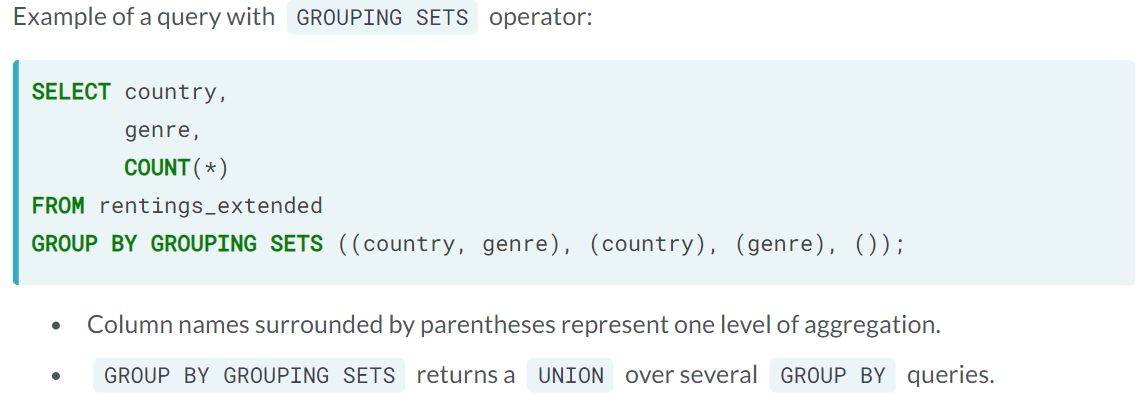

In [11]:
### 

$\qquad$ **`GROUPING SETS` & `GROUP BY` queries**

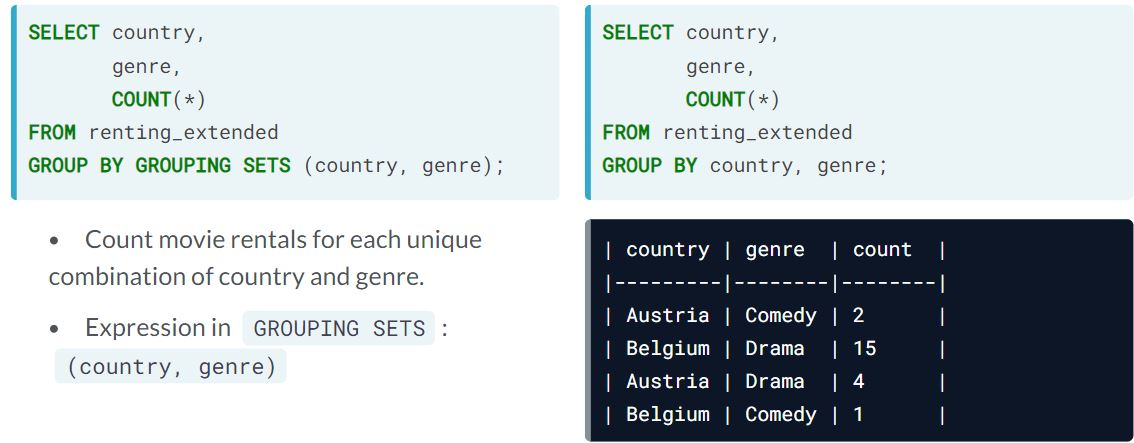

In [12]:
### 

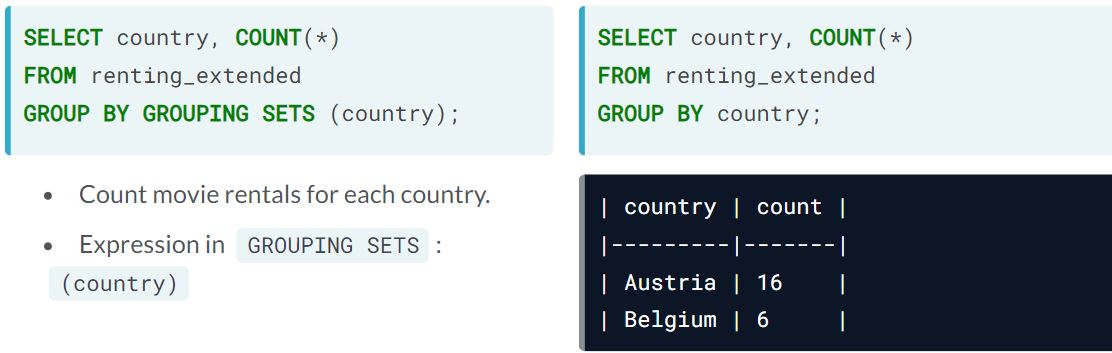

In [13]:
### 

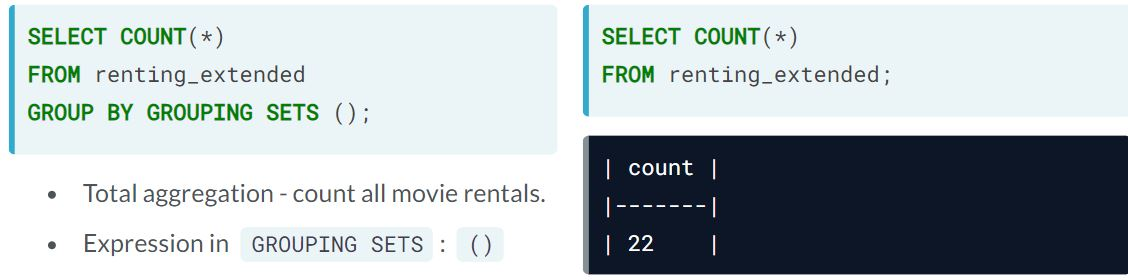

In [14]:
### 

**NOTATION for `GROUP BY` `GROUPING SETS`**

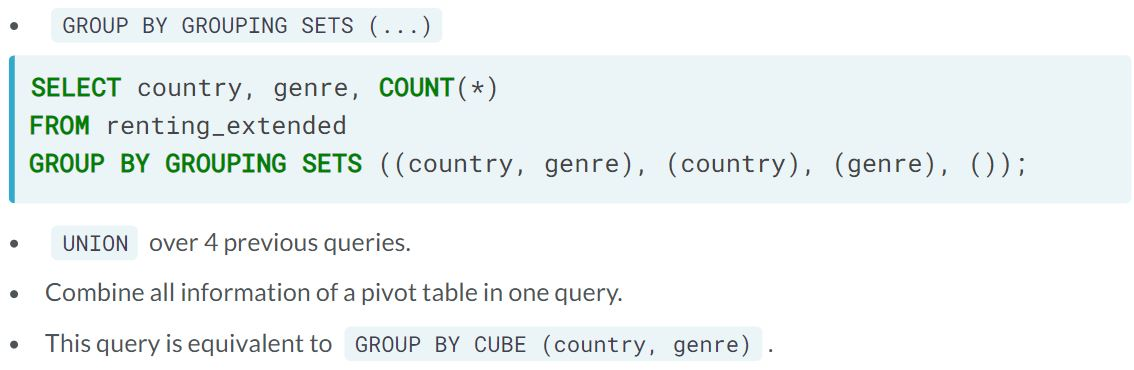

In [15]:
### 

**Result with `GROUPING SETS` operator**

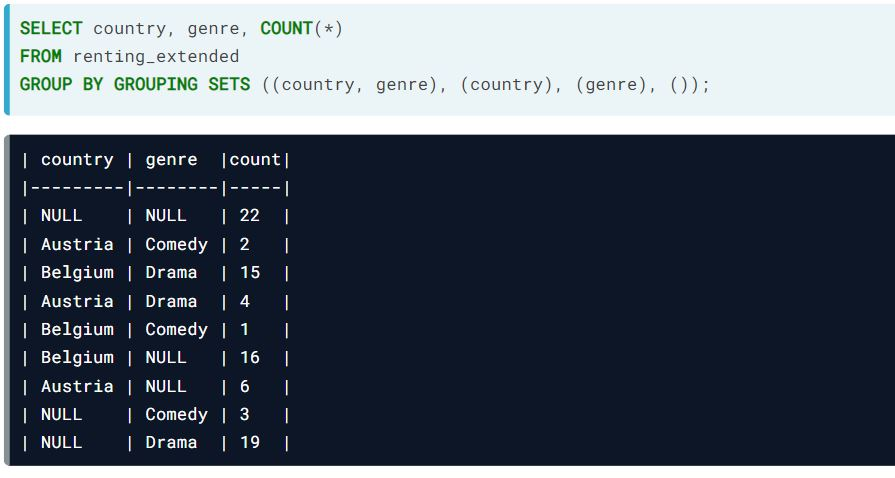

In [16]:
### 

**Calculate `number of rentals` & `average rating`**

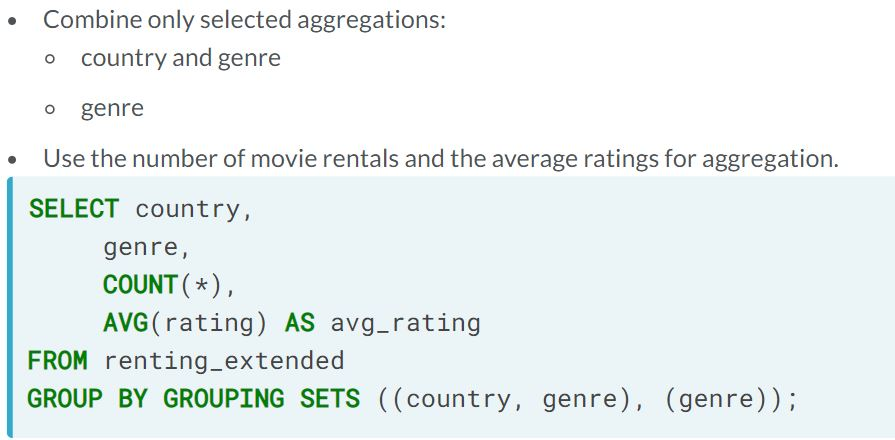

In [17]:
### 

**Result.**

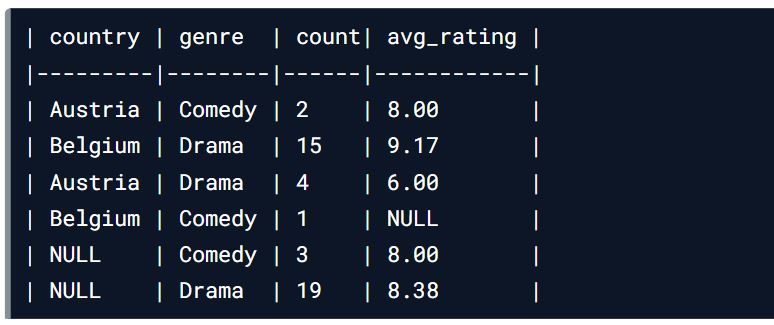

In [18]:
### 

### EXERCISE.
#### Exercise 3.1. Queries with GROUPING SETS
What question **CANNOT** be answered by the following query?

                    SELECT 
                      r.customer_id, 
                      m.genre, 
                      AVG(r.rating), 
                      COUNT(*)
                    FROM renting AS r
                    LEFT JOIN movies AS m
                    ON r.movie_id = m.movie_id
                    GROUP BY GROUPING SETS ((r.customer_id, m.genre), (r.customer_id), ());

- A. How many movies were watched by each `customer`?
- B. What is the average rating for each `genre`?
- C. What is the average rating of customer 75 for movies of the `Comedy genre`?
- D. What is the overall average rating for all movies from all `customers`?

**Answers & comments.**
- *A. Wrong!!* This question can be answered by the `query` since `GROUPING SETS` includes (`customer_id`) and therefore returns the `number of rentals` for each customer.
- **B. Correct!!!** This question cannot be answered by this `query`. `GROUPING SETS` does not include (`genre`) (i.e. does not include `aggregation` for each `genre`).
- *C. Wrong!!* This question can be answered by the `query` since `GROUPING SETS` includes (`customer_id`, `genre`) and therefore returns the average rating for each customer and each `genre`.
- *D. Incorrect!!* This question can be answered by the `query` since `GROUPING SETS` includes () for the total `aggregation` returning the overall average rating.

#### Exercise 3.2. Exploring nationality and gender of actors
$\qquad$ For each movie in the database, the three most important actors are identified and listed in the table actors. This table includes the `nationality` and `gender` of the actors. We are interested in how much diversity there is in the nationalities of the actors and how many `actors` and `actresses` are in the list.

#### Instructions
Count the number of `actors` in the table `actors` from each `country`, the number of `male` and `female` actors and the total number of `actors`.

**SOLUTION.**

            SELECT 
                nationality, -- Select nationality of the actors
                gender, -- Select gender of the actors
                COUNT(*) -- Count the number of actors
            FROM actors
            
            -- Use the correct GROUPING SETS operation
            -- Define three aggregations: (1) count by nationality (2) count by gender and (3) count all.
            GROUP BY GROUPING SETS ((nationality), (gender), ())

**`query result`.**

nationality|gender|count
:-|:-|:-
null|null|145
Somalia|null|1
null|null|2
Argentina|null|1
Spain|null|3
Italy|null|1
Puerto Rico|null|1
Iran|null|1
Northern Ireland|null|2
USA|null|91
Israel|null|1
Netherlands|null|1
South Africa|null|1
Austria|null|1
Australia|null|8
Ireland|null|2
Canada|null|4
British|null|24
null|male|90
null|female|55

`(22 rows)`

**Comments.** Using `GROUPING SETS`, we see that `91` out of `145` `actors` are from the `USA` and that there are `90 male` and `55 female actors`.

#### Exercise 3.3. Exploring rating by `country` and `gender`
$\qquad$ Now you will investigate the average rating of customers aggregated by `country` and `gender`.

#### Instructions.
**Step 1.** Select the columns `country`, `gender`, and `rating` and use the correct join to combine the table renting with `customer`.

**SOLUTION.**

                    SELECT 
                        c.country, -- Select country, gender and rating
                        c.gender,
                        r.rating
                    FROM renting AS r
                    LEFT JOIN customers AS c -- Use the correct join
                        ON r.customer_id = c.customer_id;
**`query result`.**

country|gender|rating
:-|:-|:-
Great Britan|female|null
Belgium|male|10
Spain|male|4
Great Britan|female|8
Spain|male|7
Hungary|male|7
...|...|...
Spain|female|null
Belgium|female|null
Hungary|female|10
Great Britan|female|null
Great Britan|male|9
Great Britan|male|null

`(578 rows)`

**Step 2.** Use `GROUP BY` to calculate the average rating over `country` and `gender`. Order the table by `country` and `gender`.

**SOLUTION.**

                    SELECT 
                        c.country, 
                        c.gender,
                        AVG(r.rating) -- Calculate average rating
                    FROM renting AS r
                    LEFT JOIN customers AS c
                        ON r.customer_id = c.customer_id
                    GROUP BY c.country, c.gender -- Order and group by country and gender
                    ORDER BY c.country, c.gender;
**`query result`.**

country|gender|avg
:-|:-|:-
Austria|female|7.0000000000000000
Austria|male|6.0000000000000000
Belgium|female|9.1250000000000000
Belgium|male|8.0000000000000000
Denmark|female|8.4444444444444444
Denmark|male|7.3333333333333333
France|female|8.0000000000000000
France|male|7.6666666666666667
Great Britan|female|7.2727272727272727
Great Britan|male|7.7142857142857143
Hungary|female|7.2857142857142857
Hungary|male|7.8571428571428571
Italy|female|8.3666666666666667
Italy|male|7.8928571428571429
Poland|female|7.8666666666666667
Poland|male|8.3333333333333333
Slovenia|female|8.5454545454545455
Slovenia|male|8.0909090909090909
Spain|female|7.6129032258064516
Spain|male|7.6818181818181818
USA|female|8.7500000000000000
USA|male|7.5000000000000000
null|null|8.0000000000000000

`(23 rows)`

**Step 3.** Now, use `GROUPING SETS` to get the same result, i.e. the `average rating` over `country` and `gender`.

**SOLUTION.**

                    SELECT 
                        c.country, 
                        c.gender,
                        AVG(r.rating)
                    FROM renting AS r
                    LEFT JOIN customers AS c
                    ON r.customer_id = c.customer_id
                    GROUP BY GROUPING SETS ((country, gender)); -- Group by country and gender with GROUPING SETS
**`query result`.**

country|gender|avg
:-|:-|:-
Austria|male|6.0000000000000000
France|female|8.0000000000000000
Hungary|female|7.2857142857142857
null|null|8.0000000000000000
Spain|female|7.6129032258064516
Belgium|male|8.0000000000000000
USA|male|7.5000000000000000
Denmark|female|8.4444444444444444
Austria|female|7.0000000000000000
Slovenia|male|8.0909090909090909
Belgium|female|9.1250000000000000
Slovenia|female|8.5454545454545455
Italy|female|8.3666666666666667
Denmark|male|7.3333333333333333
Great Britan|male|7.7142857142857143
France|male|7.6666666666666667
Poland|female|7.8666666666666667
Spain|male|7.6818181818181818
Italy|male|7.8928571428571429
USA|female|8.7500000000000000
Great Britan|female|7.2727272727272727
Hungary|male|7.8571428571428571
Poland|male|8.3333333333333333

`(23 rows)`

**Step 4.** Report all information that is included in a `pivot table` for `country` and `gender` in one `SQL` table.

**SOLUTION.**

                SELECT 
                    c.country, 
                    c.gender,
                    AVG(r.rating)
                FROM renting AS r
                LEFT JOIN customers AS c
                ON r.customer_id = c.customer_id
                -- Report all info from a Pivot table for country and gender
                GROUP BY GROUPING SETS ((country, gender), (country), (gender), ());
**`query result`.**

country|gender|avg
:-|:-|:-
null|null|7.9390243902439024
Austria|male|6.0000000000000000
France|female|8.0000000000000000
Hungary|female|7.2857142857142857
null|null|8.0000000000000000
Spain|female|7.6129032258064516
Belgium|male|8.0000000000000000
USA|male|7.5000000000000000
Denmark|female|8.4444444444444444
Austria|female|7.0000000000000000
Slovenia|male|8.0909090909090909
Belgium|female|9.1250000000000000
Slovenia|female|8.5454545454545455
Italy|female|8.3666666666666667
Denmark|male|7.3333333333333333
Great Britan|male|7.7142857142857143
France|male|7.6666666666666667
Poland|female|7.8666666666666667
Spain|male|7.6818181818181818
Italy|male|7.8928571428571429
USA|female|8.7500000000000000
Great Britan|female|7.2727272727272727
Hungary|male|7.8571428571428571
Poland|male|8.3333333333333333
null|null|8.0000000000000000
Spain|null|7.6415094339622642
Great Britan|null|7.5200000000000000
Austria|null|6.8000000000000000
Poland|null|8.1212121212121212
Italy|null|8.1379310344827586
Slovenia|null|8.4318181818181818
Hungary|null|7.6285714285714286
Denmark|null|7.8888888888888889
Belgium|null|8.9000000000000000
France|null|7.7714285714285714
USA|null|8.0000000000000000
null|null|8.0000000000000000
null|female|8.0529411764705882
null|male|7.8141025641025641

`(39 rows)`

**Comments.** You found out that the overall average of ratings is 7.9.

## 4. Bringing it all together.
### Business cases.

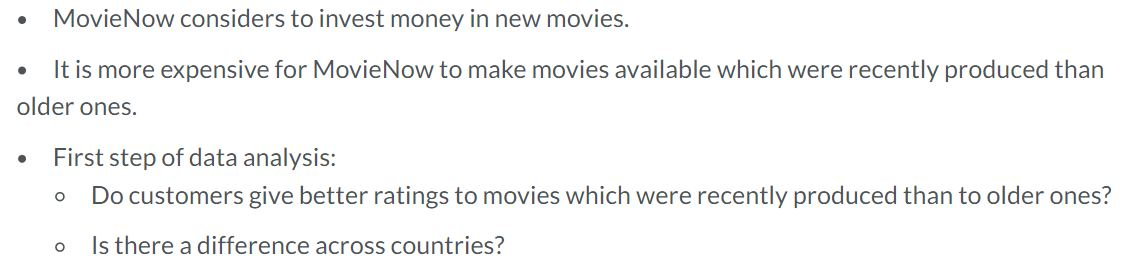

In [19]:
### 

**Example 1. `JOINING` data.**

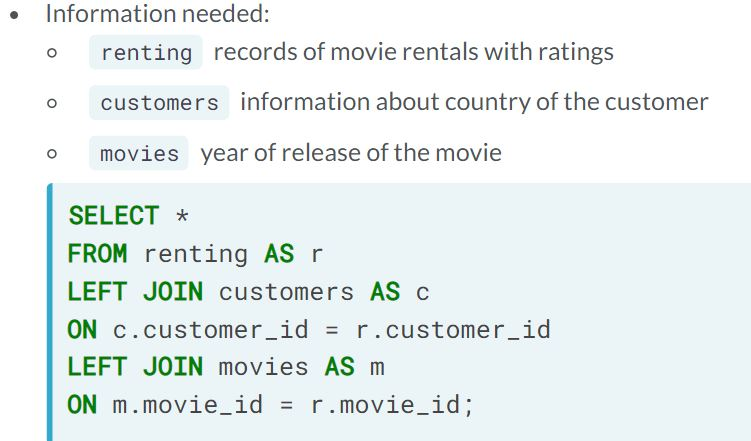

In [20]:
### 

**Example 2. `SELECT` relevent records.**

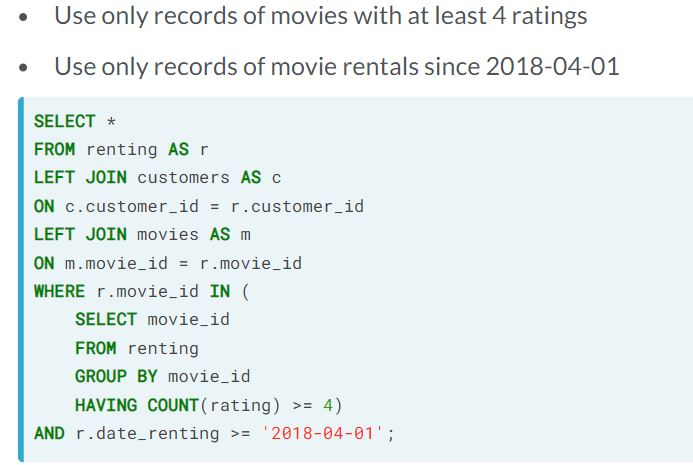

In [21]:
### 

**Example 3. `AGGREGATION`.**

$\quad \diamond$ **Types of `aggregation`.**

$\qquad \quad \bullet$ Count the number of movie rentals, the number of different movies

$\qquad \quad \bullet$ Calculate the average rating, max budget, etc.

$\quad \diamond$ **Levels of `aggregation`.**

$\qquad \quad \bullet$ Total `aggregation`.

$\qquad \quad \bullet$ For `movies` by `release_year`

$\qquad \quad \bullet$ For `movies` by `release_year` seperately for the `country of customers`.

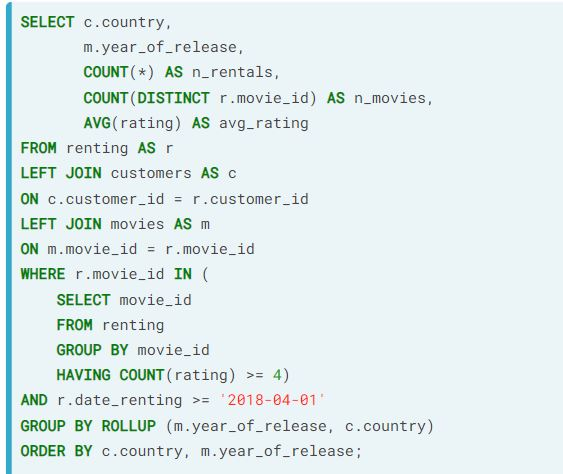

In [22]:
### 

$\quad$ **`result`.**

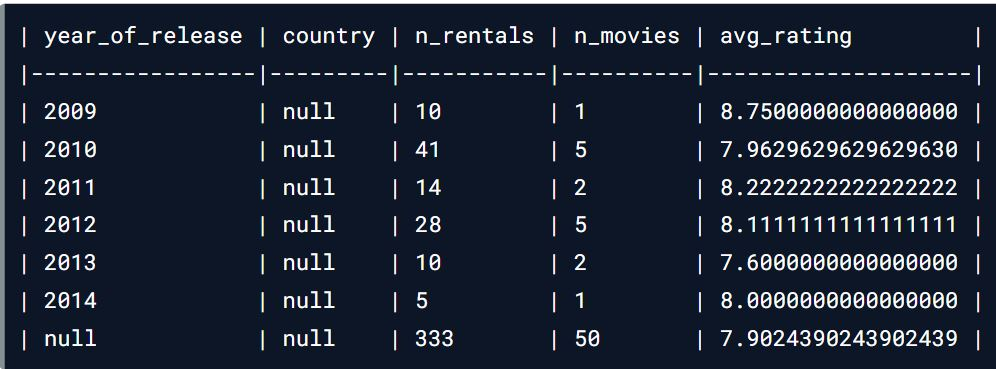

In [23]:
### 

### EXERCISE.
#### Exercise 4.1. Customer preference for `genres`
$\qquad$ You just saw that customers have no clear preference for more recent movies over older ones. Now the management considers investing money in movies of the best rated genres.

#### Instructions
**Step 1.** Augment the records of movie rentals with information about movies. Use the first letter of the table as alias.

**SOLUTION.**

                    SELECT * FROM renting AS r
                    LEFT JOIN movies AS m
                        ON r.movie_id = m.movie_id
**`query result`.**

renting_id|customer_id|movie_id|rating|date_renting|movie_id|title|genre|runtime|year_of_release|renting_price
:-|:-|:-|:-|:-|:-|:-|:-|:-|:-|:-
1|41|8|null|2018-10-09|8|Waking Up in Reno|Comedy|91|2002|2.59
2|10|29|10|2017-03-01|29|Two for the Money|Drama|122|2005|2.79
3|108|45|4|2018-06-08|45|Burn After Reading|Drama|96|2008|2.39
4|39|66|8|2018-10-22|66|The Hunger Games|Drama|142|2012|1.59
...|...|...|...|...|...|...|...|...|...|...
575|45|31|10|2018-06-09|31|Harry Potter and the Goblet of Fire|Science Fiction & Fantasy|157|2005|2.69
576|38|25|null|2018-09-02|25|Bridget Jones - The Edge of Reason|Drama|108|2004|2.89
577|35|65|9|2017-07-03|65|Ghost Rider: Spirit of Vengeance|Action & Adventure|96|2012|1.79
578|35|16|null|2017-06-20|16|25th Hour|Drama|135|2003|1.59

`(578 rows)`

**Step 2.**

**SOLUTION.**

            SELECT * FROM renting AS r
            LEFT JOIN movies AS m
                ON m.movie_id = r.movie_id
            WHERE r.movie_id IN ( -- Select records of movies with at least 4 ratings
                                SELECT movie_id
                                FROM renting
                                GROUP BY movie_id
                                HAVING COUNT(rating) >= 4)
                AND r.date_renting >= '2018-04-01'; -- Select records of movie rentals since 2018-04-01
**`query result`.**

renting_id|customer_id|movie_id|rating|date_renting|movie_id|title|genre|runtime|year_of_release|renting_price
:-|:-|:-|:-|:-|:-|:-|:-|:-|:-|:-
3|108|45|4|2018-06-08|45|Burn After Reading|Drama|96|2008|2.39
4|39|66|8|2018-10-22|66|The Hunger Games|Drama|142|2012|1.59
6|50|71|7|2018-10-09|71|Rio 2|Animation|101|2014|1.79
8|73|65|10|2018-06-05|65|Ghost Rider: Spirit of Vengeance|Action & Adventure|96|2012|1.79
12|52|65|10|2018-06-29|65|Ghost Rider: Spirit of Vengeance|Action & Adventure|96|2012|1.79
...|...|...|...|...|...|...|...|...|...|...
573|111|23|null|2018-09-24|23|Shall We Dance|Drama|106|2004|1.69
574|7|14|null|2019-02-08|14|The Recruit|Mystery & Suspense|115|2003|1.69
575|45|31|10|2018-06-09|31|Harry Potter and the Goblet of Fire|Science Fiction & Fantasy|157|2005|2.69
576|38|25|null|2018-09-02|25|Bridget Jones - The Edge of Reason|Drama|108|2004|2.89

`(333 rows)`

**Step 3.** For each `genre`, calculate the `average rating` (use the alias `avg_rating`), the `number of ratings` (use the alias `n_rating`), the number of `movie rentals` (use the alias `n_rentals`), and the number of `distinct movies` (use the alias `n_movies`).

**SOLUTION.**

         SELECT m.genre,                   -- For each genre, calculate:
                AVG(r.rating) AS avg_rating, -- The average rating and use the alias avg_rating
                COUNT(r.rating) AS n_rating, -- The number of ratings and use the alias n_rating
                COUNT(*) AS n_rentals,     -- The number of movie rentals and use the alias n_rentals
                COUNT(DISTINCT m.movie_id) AS n_movies -- The number of distinct movies and use the alias n_movies
         FROM renting AS r
         LEFT JOIN movies AS m
             ON m.movie_id = r.movie_id
         WHERE r.movie_id IN ( 
                               SELECT movie_id FROM renting
                               GROUP BY movie_id
                               HAVING COUNT(rating) >= 3)
                AND r.date_renting >= '2018-01-01'
         GROUP BY m.genre                -- grouping by genre

**`query result`.**

genre|avg_rating|n_rating|n_rentals|n_movies
:-|:-|:-|:-|:-
Action & Adventure|8.7142857142857143|7|9|2
Animation|7.8333333333333333|6|10|2
Art House & International|8.5000000000000000|4|5|1
Comedy|7.9500000000000000|20|31|5
Drama|7.7482517482517483|143|245|34
Mystery & Suspense|7.4285714285714286|7|19|3
Other|8.4285714285714286|7|16|2
Science Fiction & Fantasy|8.2765957446808511|47|70|10

`(8 rows)`

**Step 4.** Order the table by decreasing average rating.

**SOLUTION.**

                    SELECT genre,
                           AVG(rating) AS avg_rating,
                           COUNT(rating) AS n_rating,
                           COUNT(*) AS n_rentals,     
                           COUNT(DISTINCT m.movie_id) AS n_movies 
                    FROM renting AS r
                    LEFT JOIN movies AS m
                    ON m.movie_id = r.movie_id
                    WHERE r.movie_id IN ( 
                                        SELECT movie_id
                                        FROM renting
                                        GROUP BY movie_id
                                        HAVING COUNT(rating) >= 3 )
                        AND r.date_renting >= '2018-01-01'
                    GROUP BY genre
                    ORDER BY avg_rating; -- Order the table by decreasing average rating
**`query result`.**

genre|avg_rating|n_rating|n_rentals|n_movies
:-|:-|:-|:-|:-
Action & Adventure|8.7142857142857143|7|9|2
Art House & International|8.5000000000000000|4|5|1
Other|8.4285714285714286|7|16|2
Science Fiction & Fantasy|8.2765957446808511|47|70|10
Comedy|7.9500000000000000|20|31|5
Animation|7.8333333333333333|6|10|2
Drama|7.7482517482517483|143|245|34
Mystery & Suspense|7.4285714285714286|7|19|3

`(8 rows)`

**Comments.** Hence, the `Action & Adventure` has the `highest rating`.

#### Exercise 4.2. Customer preference for actors
$\qquad$ The last aspect you have to analyze are customer preferences for certain actors.

#### Instructions
**Step 1.** Join the tables.

**SOLUTION.**

            SELECT * FROM renting AS r
            LEFT JOIN actsin AS ai
                ON ai.movie_id = r.movie_id
            LEFT JOIN actors AS a
                ON ai.actor_id = a.actor_id;
**`query result`.**

renting_id|customer_id|movie_id|rating|date_renting|actsin_id|movie_id|actor_id|actor_id|name|year_of_birth|nationality|gender
:--|:--|:--|:--|:--|:--|:--|:--|:--|:--|:--|:--|:--
1|41|8|null|2018-10-09|160|8|107|107|Patrick Swayze|1952|USA|male
1|41|8|null|2018-10-09|152|8|103|103|Natasha Richardson|1963|British|female
1|41|8|null|2018-10-09|28|8|23|23|Charlize Theron|1975|South Africa|female
2|10|29|10|2017-03-01|172|29|117|117|Rene Russo|1954|USA|female
2|10|29|10|2017-03-01|143|29|96|96|Matthew McConaughey|1969|USA|male
2|10|29|10|2017-03-01|5|29|3|3|Al Pacino|1940|USA|male
3|108|45|4|2018-06-08|118|45|74|74|John Malkovich|1953|USA|male
3|108|45|4|2018-06-08|80|45|49|49|George Clooney|1961|USA|male
3|108|45|4|2018-06-08|74|45|45|45|Frances McDormand|1957|USA|female
4|39|66|8|2018-10-22|130|66|86|86|Liam Hemsworth|1990|Australia|male
...|...|...|...|...|...|...|...|...|...|...|...|...
576|38|25|null|2018-09-02|94|25|58|58|Hugh Grant|1960|British|male
577|35|65|9|2017-07-03|155|65|105|105|Nicolas Cage|1964|USA|male
577|35|65|9|2017-07-03|38|65|28|28|Ciaran Hinds|1953|Northern Ireland|male
577|35|65|9|2017-07-03|210|65|142|142|Violante Placido|1976|Italy|female
578|35|16|null|2017-06-20|165|16|111|111|Philip Seymour Hoffman|1967|USA|male
578|35|16|null|2017-06-20|58|16|39|39|Edward Norton|1969|USA|male
578|35|16|null|2017-06-20|14|16|11|11|Barry Pepper|1970|Canada|male

`(1734 rows)`

**Step 2.** For each combination of the `actors' nationality` and `gender`, calculate the `average rating`, the `number of ratings`, the `number of movie rentals`, and the `number of actors`.

**SOLUTION.**

            SELECT a.nationality,
                   a.gender,
                   AVG(r.rating) AS avg_rating, -- The average rating
                   COUNT(r.rating) AS n_rating, -- The number of ratings
                   COUNT(*) AS n_rentals, -- The number of movie rentals
                   COUNT(DISTINCT a.actor_id) AS n_actors -- The number of actors
            FROM renting AS r
            LEFT JOIN actsin AS ai
                ON ai.movie_id = r.movie_id
            LEFT JOIN actors AS a
                ON ai.actor_id = a.actor_id
            WHERE r.movie_id IN ( 
                                SELECT movie_id FROM renting
                                GROUP BY movie_id
                                HAVING COUNT(rating) >=4 )
                AND r.date_renting >= '2018-04-01'
            GROUP BY a.nationality, a.gender; -- For each combination of the actors' nationality and gender
**`query result`.**

nationality|gender|avg_rating|n_rating|n_rentals|n_actors
:-|:-|:-|:-|:-|:-
Argentina|male|8.5000000000000000|4|5|1
Australia|female|8.6666666666666667|3|5|1
Australia|male|7.4545454545454545|11|17|3
Austria|male|8.5000000000000000|2|6|1
British|female|7.8333333333333333|54|78|3
British|male|8.1052631578947368|114|175|9
Canada|female|8.0000000000000000|5|5|1
Canada|male|8.4285714285714286|7|13|2
Ireland|male|7.7142857142857143|7|16|2
Israel|female|8.2500000000000000|4|8|1
Italy|female|9.0000000000000000|4|4|1
Northern Ireland|male|9.0000000000000000|4|4|1
Puerto Rico|male|7.2000000000000000|5|7|1
Somalia|male|7.0000000000000000|3|5|1
South Africa|female|8.2142857142857143|14|21|1
Spain|female|8.5000000000000000|4|5|1
Spain|male|8.8571428571428571|7|12|2
USA|female|7.5454545454545455|121|212|27
USA|male|7.9132231404958678|242|401|42

`(19 rows)`

**Step 3.** Provide results for all aggregation levels represented in a `pivot table`.

**SOLUTION.**

                SELECT a.nationality,
                       a.gender,
                       AVG(r.rating) AS avg_rating,
                       COUNT(r.rating) AS n_rating,
                       COUNT(*) AS n_rentals,
                       COUNT(DISTINCT a.actor_id) AS n_actors
                FROM renting AS r
                LEFT JOIN actsin AS ai
                    ON ai.movie_id = r.movie_id
                LEFT JOIN actors AS a
                    ON ai.actor_id = a.actor_id
                WHERE r.movie_id IN ( 
                                    SELECT movie_id
                                    FROM renting
                                    GROUP BY movie_id
                                    HAVING COUNT(rating) >= 4)
                    AND r.date_renting >= '2018-04-01'
                
                -- Provide results for all aggregation levels represented in a pivot table    
                GROUP BY GROUPING SETS ((a.nationality, a.gender), (a.nationality), (a.gender), ()); 

**`query result`.**

nationality|gender|avg_rating|n_rating|n_rentals|n_actors
:-|:-|:-|:-|:-|:-
Argentina|male|8.5000000000000000|4|5|1
Argentina|null|8.5000000000000000|4|5|1
Australia|female|8.6666666666666667|3|5|1
Australia|male|7.4545454545454545|11|17|3
Australia|null|7.7142857142857143|14|22|4
Austria|male|8.5000000000000000|2|6|1
Austria|null|8.5000000000000000|2|6|1
British|female|7.8333333333333333|54|78|3
British|male|8.1052631578947368|114|175|9
British|null|8.0178571428571429|168|253|12
Canada|female|8.0000000000000000|5|5|1
Canada|male|8.4285714285714286|7|13|2
Canada|null|8.2500000000000000|12|18|3
Ireland|male|7.7142857142857143|7|16|2
Ireland|null|7.7142857142857143|7|16|2
Israel|female|8.2500000000000000|4|8|1
Israel|null|8.2500000000000000|4|8|1
Italy|female|9.0000000000000000|4|4|1
Italy|null|9.0000000000000000|4|4|1
Northern Ireland|male|9.0000000000000000|4|4|1
Northern Ireland|null|9.0000000000000000|4|4|1
Puerto Rico|male|7.2000000000000000|5|7|1
Puerto Rico|null|7.2000000000000000|5|7|1
Somalia|male|7.0000000000000000|3|5|1
Somalia|null|7.0000000000000000|3|5|1
South Africa|female|8.2142857142857143|14|21|1
South Africa|null|8.2142857142857143|14|21|1
Spain|female|8.5000000000000000|4|5|1
Spain|male|8.8571428571428571|7|12|2
Spain|null|8.7272727272727273|11|17|3
USA|female|7.5454545454545455|121|212|27
USA|male|7.9132231404958678|242|401|42
USA|null|7.7906336088154270|363|613|69
null|null|7.9024390243902439|615|999|101
null|female|7.7511961722488038|209|338|36
null|male|7.9802955665024631|406|661|65

`(36 rows)`